In [1]:
import cv2 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

imreconstruct function for python from https://gist.github.com/Semnodime/ddf1e63d4405084f886204e73ecfabcd

In [2]:
def imreconstruct(marker: np.ndarray, mask: np.ndarray, radius: int = 1):
    """Iteratively expand the markers white keeping them limited by the mask during each iteration.

    :param marker: Grayscale image where initial seed is white on black background.
    :param mask: Grayscale mask where the valid area is white on black background.
    :param radius Can be increased to improve expansion speed while causing decreased isolation from nearby areas.
    :returns A copy of the last expansion.
    Written By Semnodime.
    """
    kernel = np.ones(shape=(radius * 2 + 1,) * 2, dtype=np.uint8)
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        cv2.bitwise_and(src1=expanded, src2=mask, dst=expanded)

        # Termination criterion: Expansion didn't change the image at all
        if (marker == expanded).all():
            return expanded
        marker = expanded


Read image and initialise kernel

In [3]:
img = cv2.imread(r"C:\Users\Poonam\Documents\GitHub\Morphological_Img_proc\Morphological_img_proc\TestImg.png", 0) 
kernel = np.ones((8,10), np.uint8) 

Perform erosion

In [4]:
img_erosion = cv2.erode(img, kernel, iterations=2) 

Display original image and eroded image

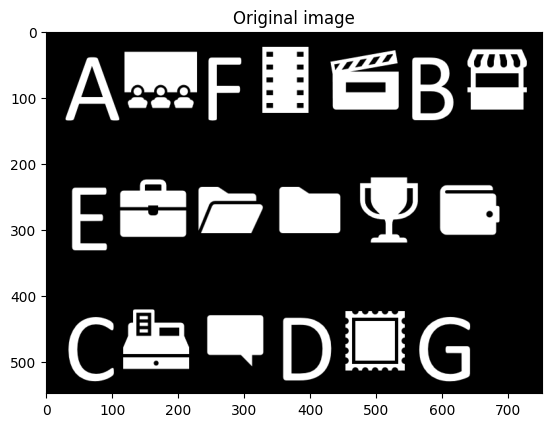

In [5]:
plt.imshow(img,cmap='binary_r') 
plt.title('Original image')
plt.show()

Text(0.5, 1.0, 'Erosion')

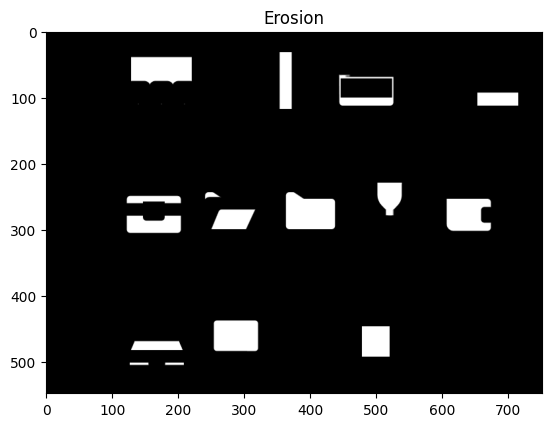

In [6]:
plt.imshow(img_erosion,cmap='binary_r')
plt.title('Erosion')

Perform reconstruction

In [7]:
img_recon=imreconstruct(img_erosion,img,6)

Reconstructed image contains only the symbols from the original file. Subtract it from the original image to obtain the letters

In [8]:
img2=img-img_recon

Display the result

-1

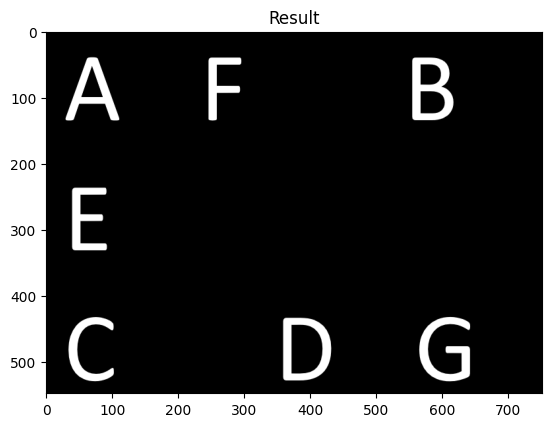

In [9]:
plt.imshow(img2,cmap='binary_r')
plt.title('Result')
cv2.waitKey(0) 